In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import itertools
import string

### ***Generación de población inicial | Codificación del problema***

In [2]:
def genera_poblacion(cant_ciudades, cant_pobladores):
    # Generar un arreglo de numpy con la cantidad de ciudades a utilizar
    lista = np.linspace(1,cant_ciudades,cant_ciudades)
    poblacion_disponible = np.linspace(1,cant_ciudades,cant_ciudades)
    poblacion_disponible = list(poblacion_disponible.astype(int))
    #poblacion_disponible = np.linspace(1,cant_ciudades, cant_ciudades)
    poblacion_codificada = []
    for i in range(cant_pobladores):
        #Tomar una muestra de la población especificada (sin repetir elementos)
        poblador = random.sample(poblacion_disponible, k=cant_ciudades)
        poblador = np.array(poblador)
        #Se añade el poblador a la población y se repite el proceso hasta acabar con la cantidad de pobladores
        poblacion_codificada.append(poblador)
    return poblacion_codificada

### ***Cruza por correspondencia parcial (PMX)***

In [3]:
def cruza_PMX(padre1, padre2):
    num_genes = len(padre1)
    corte = int(np.round(num_genes / 3))  #Cantidad de cortes a realizar, en este caso son 3 cortes sea cual sea la cadena.
    #Las cadenas iniciales del hijo serán vacías ya que aún no se les asignan elementos
    i = random.randint(-3,3) #Cantidad de elementos a la izquierda o derecha a los que se va a desplazar la subcadena de genes elegida
    
    hijo_1 = [None] * num_genes 
    hijo_2 = [None] * num_genes

    hijo_1[corte+i:(2*corte)+i] = padre2[corte+i:(2*corte)+i] #Se asigna la parte central de los padres para este método
    hijo_2[corte+i:(2*corte)+i] = padre1[corte+i:(2*corte)+i] #Se asigna la parte central de los padres para este método

    sub_h1 = hijo_1[corte+i:(2*corte)+i] #Se recupera la subcadena para simular el mapa de correspondencia
    sub_h2 = hijo_2[corte+i:(2*corte)+i] #Se recupera la subcadena para simular el mapa de correspondencia
    
    indicesh1 = [i for i, elemento in enumerate(hijo_1) if elemento is None] #Se recuperan los indices de los elementos nulos
    indicesh2 = [i for i, elemento in enumerate(hijo_2) if elemento is None] #Se recuperan los indices de los elementos nulos

    #Creación del primer hijo
    for indice in indicesh1:
        # El gen de partida será el gen del padre en dicho indice (donde el hijo sea None)
        gen_padre = padre1[indice] 
        while(hijo_1[indice] == None): # Mientras que el elemento actual del hijo sea elemento vacío
            aux = gen_padre
            if gen_padre not in hijo_1: # Si el gen seleccionado no está en el cromosoma del hijo
                hijo_1[indice] = aux # asignarlo
            else: # en caso contrario
                aux = sub_h1.index(aux) #Si el gen está en el cromosoma del hijo, el proximo gen a revisar será el elemento asociado a dicho elemento (segun el mapa de correspondencia)
                gen_padre = sub_h2[aux]
    
    #Creación del segundo hijo
    for indice in indicesh2:
        # El gen de partida será el gen del padre en dicho indice (donde el hijo sea None)
        gen_padre = padre2[indice]
        while(hijo_2[indice] == None): #Mientras que el elemento actual del hijo sea elemento vacío
            aux = gen_padre
            if gen_padre not in hijo_2: # Si el gen seleccionado no está en el cromosoma del hijo
                hijo_2[indice] = aux # asignarlo
            else: # en caso contrario
                aux = sub_h2.index(aux) #Si el gen está en el cromosoma del hijo, el proximo gen a revisar será el elemento asociado a dicho elemento (segun el mapa de correspondencia)
                gen_padre = sub_h2[aux]
                gen_padre = sub_h1[aux]
                
    return hijo_1, hijo_2

### ***Operador de cruza basado en orden (OX1)***

In [4]:
def cruza_OX1(padre1, padre2):
    num_genes = len(padre1)
    corte = int(np.round(num_genes/ 3)) #Cantidad de cortes a realizar, en este caso son 3 cortes sea cual sea la cadena.
    i =random.randint(-3,3) #Cantidad de elementos a la izquierda o derecha a los que se va a desplazar la subcadena de genes elegida
    #Las cadenas iniciales del hijo serán vacías ya que aún no se les asignan elementos
    hijo_1 = [None] * num_genes 
    hijo_2 = [None] * num_genes
    
    hijo_1[corte+i:(2*corte)+i] = padre1[corte+i:(2*corte)+i] #Se asigna la parte central de los padres para este método
    hijo_2[corte+i:(2*corte)+i] = padre2[corte+i:(2*corte)+i] #Se asigna la parte central de los padres para este método
    #Indices donde comenzará el primer elemento a calcular y donde finalizará el último
    indice_inicio = np.where(np.array(hijo_1)!= None)[0][-1] + 1 # Indice de inicio de asignación de elementos
    indice_fin = np.where(np.array(hijo_1)!= None)[0][1] -1 # Indice de finalización de asignación de elementos
    #Logica para calcular los elementos del hijo 1
    j = 0
    for i in range(indice_inicio, len(hijo_1) + indice_fin ): #Comienza ciclo en el primer elemento vacío
        #Los indices de las listas estan definidos con % len(hijo) debido a que se "simula" una lista circular"        
        while (hijo_1[i % len(hijo_1)] == None):
            ind = (j  +  i) % len(hijo_1) # El indice actual será el módulo entre j (contador) + i (indices válidos para asignar elementos), y la longitud de la cadena
            gen = padre2[ind % len(hijo_1)]
            if gen not in hijo_1: #Si el elemento buscado del padre, no está en el hijo se asigna, de lo contrario se pasa al siguiente elemento del padre para buscar posibilidad de asignación
                hijo_1[i % len(hijo_1)] = gen
                break
            else:
                j = j + 1 #Actualización del índice al siguiente elemento (si el actual no fue posible asignarlo)

    #Logica para calcular los elementos del hijo 2
    j = 0
    for i in range(indice_inicio, len(hijo_1) + indice_fin ): #Comienza ciclo en el primer elemento vacío
        #Los indices de las listas estan definidos con % len(hijo) debido a que se "simula" una lista circular"        
        while (hijo_2[i % len(hijo_1)] == None):
            ind = (j  +  i) % len(hijo_1) # El indice actual será el módulo entre j (contador) + i (indices válidos para asignar elementos), y la longitud de la cadena
            gen = padre1[ind % len(hijo_1)]
            if gen not in hijo_2: #Si el elemento buscado del padre, no está en el hijo se asigna, de lo contrario se pasa al siguiente elemento del padre para buscar posibilidad de asignación
                hijo_2[i % len(hijo_1)] = gen
                break
            else:
                j = j + 1 #Actualización del índice al siguiente elemento (si el actual no fue posible asignarlo)

    return hijo_1, hijo_2

In [5]:
MD = pd.read_csv("matrizDeDistancias.csv")
MD = MD.set_index('Unnamed: 0')
MD

,Mexico City,Merida,Buenos Aires,Quito,Washington D.C.,New York,Miami,Monterrey,Panama City,San Salvador,Managua,Brazilia,Mendoza,Caracas,Montevideo,Guadalajara,Boston,Bogotá
Unnamed: 0,,,,,,,,,,,,,,,,,,
Mexico City,0.0,994.0,7351.0,3128.0,3029.0,3363.0,2057.0,708.65,2409.0,1234.0,1605.0,6829.0,6626.0,3599.0,7535.0,487.0,3664.0,3170.0
Merida,994.0,0.0,6984.0,2634.0,2324.0,2649.0,1103.0,1210.00,1712.0,806.0,1043.0,6107.0,6360.0,2693.0,7121.0,1429.0,2939.0,2466.0
Buenos Aires,7351.0,6984.0,0.0,4347.0,8364.0,8501.0,7088.0,8006.00,5318.0,6261.0,5951.0,2333.0,979.0,5075.0,209.0,7746.0,8623.0,4648.0
Quito,3128.0,2634.0,4347.0,0.0,4330.0,4559.0,2920.0,3702.00,1026.0,1938.0,1610.0,3777.0,3759.0,1746.0,4488.0,3555.0,4770.0,725.0
Washington D.C.,3029.0,2324.0,8364.0,4330.0,0.0,334.0,1452.0,2622.00,3318.0,3038.0,3103.0,6774.0,7996.0,3304.0,8447.0,3231.0,633.0,3806.0
New York,3363.0,2649.0,8501.0,4559.0,334.0,0.0,1728.0,2948.00,3558.0,3346.0,3393.0,6819.0,8173.0,3427.0,8572.0,3560.0,300.0,4001.0
Miami,2057.0,1103.0,7088.0,2920.0,1452.0,1728.0,0.0,2009.00,1875.0,1647.0,1654.0,5797.0,6625.0,2216.0,7195.0,2428.0,2005.0,2448.0
Monterrey,709.0,1210.0,8006.0,3702.0,2622.0,2948.0,2009.0,0.00,2873.0,1765.0,2107.0,7300.0,7298.0,3903.0,8162.0,642.0,3243.0,3640.0
Panama City,2409.0,1712.0,5318.0,1026.0,3318.0,3558.0,1875.0,2873.00,0.0,1179.0,814.0,4432.0,4778.0,1393.0,5445.0,2866.0,3785.0,767.0


### ***Evaluación de aptitud (distancias entre ciudades)***

In [6]:
def aptitud(poblacion):
    
    n = len(poblacion)
    cant_genes = len(poblacion[0])
    aptitud = []

    recorrido = []
    decode = []
    matriz_con_aptitud = pd.DataFrame()
    #Ciclo para recorrer cada poblador
    for k in range(n):
        #Se guarda el indice de la primera ciudad
        primera_ciudad = int(poblacion[k][0]) - 1 
        recorrido = [MD.columns[primera_ciudad]] #Se guarda el nombre de la primera ciudad (ciudad de partida)
        distancia = 0 #la distancia inicial recorrida será cero
        
        for i in range(cant_genes-1): #Para el cálculo de aptitud en el poblador actual se recorre cada gen del cromosoma
            ciudad_actual = poblacion[k][i] - 1 #Se recupera el indice de la ciudad de partida
            ciudad_destino = poblacion[k][i+1] - 1 #Se recupera el indice de la ciudad de destino
            distancia = distancia + MD.iloc[ciudad_actual,ciudad_destino] #Se calcula la distancia de la ciudad de partida a la ciudad de destino
            recorrido = recorrido + [MD.columns[ciudad_destino]] #Se concatena el nombre de la ciudad al recorrido seguido
        # Condiciones de la ultima ciudad al origen
        recorrido = recorrido + [MD.columns[primera_ciudad]]
        ultima_ciudad = poblacion[k][-1] - 1 
        distancia = distancia + MD.iloc[ultima_ciudad,primera_ciudad]
        aptitud.append(distancia)
        decode.append(recorrido)
    # Se guardan los resultados de aptitud (flotante), población (población original) y ruta seguida (nombres de ciudades visitadas en orden) en un
    # DataFrame, mismo que se retorna.
    matriz_con_aptitud["APTITUD"] = aptitud
    matriz_con_aptitud["POBLACION"] = poblacion
    matriz_con_aptitud["RUTA SEGUIDA"] = decode
    
    return matriz_con_aptitud

## **Métodos de selección**
### 1) Ruleta
### 2) Torneo

In [7]:
def ruleta(poblacion, aptitud):
    n = len(poblacion) # n = numero de elementos a obtener (hijos)
    num_genes = len(poblacion[0]) # Calcula el numero de genes (por si en algun punto debe escalar a más genes pares)
    i = 0
    poblacion_hijos = []
    # Vector auxiliar para calcular la distribucion de probabilidad del ranking
    probabilidad_padre = aptitud / np.sum(aptitud) # Distribucion de probabilidad por ranking
    while ( i < (n/2) ):
        # Hijos generados (dos posibles, por cada pareja de padres seleccionados)
        padre1 = np.random.choice(poblacion, 1, p=probabilidad_padre)
        padre2 = np.random.choice(poblacion, 1, p=probabilidad_padre)
        
        hijo_1, hijo_2 = cruza_OX1(padre1[0], padre2[0]) # #CRUZA OX1
        #hijo_1, hijo_2 = cruza_PMX(padre1[0], padre2[0]) #CRUZA PMX
        
        poblacion_hijos.append(hijo_1)
        poblacion_hijos.append(hijo_2)
        i+=1
    return poblacion_hijos

In [8]:
def tournament(poblacion):
    n = len(poblacion) #n = numero de elementos a obtener (hijos)
    num_genes = len(poblacion[0]) #Calcula el numero de genes (por si en algun punto debe escalar a más genes pares)
    i = 0

    poblacion_disponible = poblacion
    poblacion_hijos = []
    while ( i < (n/2) ):
        #Hijos generados (forzosamente con población previamente ordenada), se cruzan padres 1-10, 2-9, 3-8, y así sucesivamente
        
        hijo_1, hijo_2 = cruza_OX1(poblacion[i], poblacion[n-1-i]) #CRUZA OX1
        #hijo_1, hijo_2 = cruza_PMX(poblacion[i], poblacion[n-1-i]) #CRUZA PMX
        
        poblacion_hijos.append(hijo_1)
        poblacion_hijos.append(hijo_2)
        i+=1
    return poblacion_hijos

## **Métodos de mutación**

In [9]:
def scramble_mutation(poblacion, porc_mut):
    # Porc_mut = porcentaje de individuos hijos a mutar (en decimal)
    # poblacion_hijos = poblacion total de hijos en una generación dada
    cant_hijos_mutados = int(len(poblacion) * porc_mut)
    hijos_a_mutar = poblacion[ len(poblacion) - cant_hijos_mutados: ] #Se seleccionan los hijos a mutar (en este caso los últimos, los menos aptos)
    
    i = random.randint(-5,5) # Selección de cómo se desplazará la cadena(genes a la izquierda, derecha, o a ningún lado)
    indice = int(np.round(len(hijos_a_mutar[0])/3)) #índice a partir del cual se hará la separación entre subrista para la mutación

    for index, hijo in enumerate(hijos_a_mutar):
        subcadena = hijo[ indice+i : (2*indice)+i ]
        cromosoma = hijo[ :indice+i ] + hijo[ (2*indice)+i : ]
        
        sub_mezclada = subcadena.copy()
        while(sub_mezclada == subcadena):
            random.shuffle(sub_mezclada)

        cromosoma_filtrado = cromosoma[ 0:(indice+i) ] + cromosoma[ (indice+i)+1 : ]
        cromosoma_aux = cromosoma_filtrado.copy()
        cromosoma_aux.append(-1)
        insercion = random.sample(cromosoma_aux, 1)
        if insercion[0] != -1:
            indice_insercion = cromosoma.index(insercion[0])
        else:
            indice_insercion = len(cromosoma)
            
        cromosoma[indice_insercion:indice_insercion] = sub_mezclada
        hijos_a_mutar[index] = cromosoma
        
    poblacion[len(poblacion)-cant_hijos_mutados:] = hijos_a_mutar

In [10]:
def heuristic_mutation(poblacion, porc_mut):
    
    cant_hijos_mutados = int(len(poblacion) * porc_mut)
    hijos_a_mutar = poblacion[ len(poblacion) - cant_hijos_mutados: ]
    indice = int(np.round(len(hijos_a_mutar[0])/3))
    
    i = random.randint(-5,5)
    mutados = []
    for individuo in hijos_a_mutar:
        subcadena = individuo[ indice+i : (2*indice)+i ]
        cromosoma = individuo[ 0:indice+i ] + individuo[ (2*indice)+i : ]

        permutaciones = list(itertools.permutations(subcadena))
        permutaciones_listas = [list(p) for p in permutaciones]
        posibilidades_hijo = []
        for p in permutaciones_listas:
            posibilidades_hijo.append(cromosoma[0:indice+i] + p + cromosoma[indice+i:])
        aptitud_hijo = aptitud(posibilidades_hijo)
        indice_mas_apto = np.argmin(aptitud_hijo["APTITUD"])
        mutados.append(posibilidades_hijo[indice_mas_apto])
        
    poblacion[len(poblacion) - cant_hijos_mutados: ] = mutados

### ***Progresión gráfica de la aptitud de los pobladores***

In [11]:
def grafica_poblacion(x,y, y2,y3, i, generaciones, ylim, lv):
    ylim0 = np.min(MD[MD>0]) * 18
    plt.plot( x, y, '-o', color = "red", label = "Aptitud promedio")
    plt.plot( x, y2, '-o', color = "green", label = "Mejor Aptitud")
    plt.plot( x, y3, '-o', color = "purple", label = "Peor Aptitud")
    plt.axvline(x=lv, color='r', linestyle='--', label='Inicio de mutación')
    plt.xlim([-1, generaciones+1 ] )
    plt.ylim([ylim0*4, ylim + 1000])
    plt.grid()
    leyenda = 'Aptitudes: Promedio = {:.2f}, Mínima = {:.2f}, Máxima =  {:.2f}, Generación {:d}'.format(y[-1], y2[-1], y3[-1], i)
    plt.title(leyenda, weight ="bold");
    plt.xlabel('Generaciones', weight ="bold");
    plt.ylabel('Distancia (km)',  weight ="bold");
    plt.legend()
    clear_output(wait=True)
    plt.show()

## **Algoritmo genetico completo**

In [12]:
def TSP_alg_genetico(generaciones, poblacion, mut_estagn = False):
    
    matriz_con_aptitud = aptitud(poblacion)
    matriz_con_aptitud = matriz_con_aptitud.sort_values(by="APTITUD", ascending = True).reset_index(drop=True)
    
    i_graph = []
    a2_graph = []
    apt_max_graph = []
    apt_min_graph = []
    mutacion = False
    ylim = matriz_con_aptitud["APTITUD"][len(matriz_con_aptitud)-1]
    lv = 0 if not mut_estagn else -5
    for i in range(generaciones+1):
        plt.figure(figsize=(12, 4))
    
        if(i == 0):
            a2 = (matriz_con_aptitud["APTITUD"].mean())
            a3 = (matriz_con_aptitud["APTITUD"][0])
            a4 = matriz_con_aptitud["APTITUD"][len(matriz_con_aptitud)-1]
            
            i_graph.append(i)
            a2_graph.append(a2)
            apt_max_graph.append(a3)
            apt_min_graph.append(a4)
    
            grafica_poblacion(i_graph,a2_graph,apt_max_graph,apt_min_graph, i, generaciones, ylim, lv)
        else:
            #METODO DE TORNEO PARA SELECCIÓN (DENTRO DEL METODO DE SELECCIÓN SE PUEDE SELECCIONAR EL MÉTODO DE CRUZA PREFERIDO)
            poblacion_hijos = tournament(matriz_con_aptitud["POBLACION"])
            
            #METODO DE RULETA PARA SELECCIÓN (DENTRO DEL METODO DE SELECCIÓN SE PUEDE SELECCIONAR EL MÉTODO DE CRUZA PREFERIDO)
            #poblacion_hijos = ruleta(matriz_con_aptitud["POBLACION"], matriz_con_aptitud["APTITUD"])
            
            #INICIO DE MUTACIÓN DESDE EL COMIENZO
            if(not mut_estagn):
                scramble_mutation(poblacion_hijos, 0.1)
                #heuristic_mutation(poblacion_hijos, 0.1)
            #INICIO DE MUTACIÓN EN ESTAGNACIÓN
            else:
                if( i>3 and abs( np.diff(apt_max_graph[-3:]).mean() ) < 100  and not mutacion):
                    lv = i
                    mutacion = True
                if(mutacion):
                    #heuristic_mutation(poblacion_hijos, 0.1)
                    scramble_mutation(poblacion_hijos, 0.1)
                    
            matriz_con_aptitud_hijos = aptitud(poblacion_hijos)
            matriz_mixed = pd.concat([matriz_con_aptitud, matriz_con_aptitud_hijos], ignore_index=True)
            
            matriz_final = matriz_mixed.sort_values(by="APTITUD", ascending = True).reset_index(drop=True)
            matriz_con_aptitud = matriz_final[0:int(len(matriz_final)/2)]
            
            a2 = matriz_con_aptitud["APTITUD"].mean()
            a3 = matriz_con_aptitud["APTITUD"][0]
            a4 = matriz_con_aptitud["APTITUD"][len(matriz_con_aptitud)-1]
        
            i_graph.append(i)
            a2_graph.append(a2)
            apt_max_graph.append(a3)
            apt_min_graph.append(a4)
            grafica_poblacion(i_graph,a2_graph,apt_max_graph,apt_min_graph, i, generaciones, ylim, lv)
            
            if( i > 5  and ( np.mean(apt_max_graph[-5:]) == np.mean(apt_min_graph[-5:]) ) ):
                break;
    return matriz_con_aptitud, i

### **Ejemplificación del algoritmo**

In [13]:
poblaciones = []
random.seed(34)
for i in range(3):
    d = genera_poblacion(18,400)
    poblaciones.append(d)

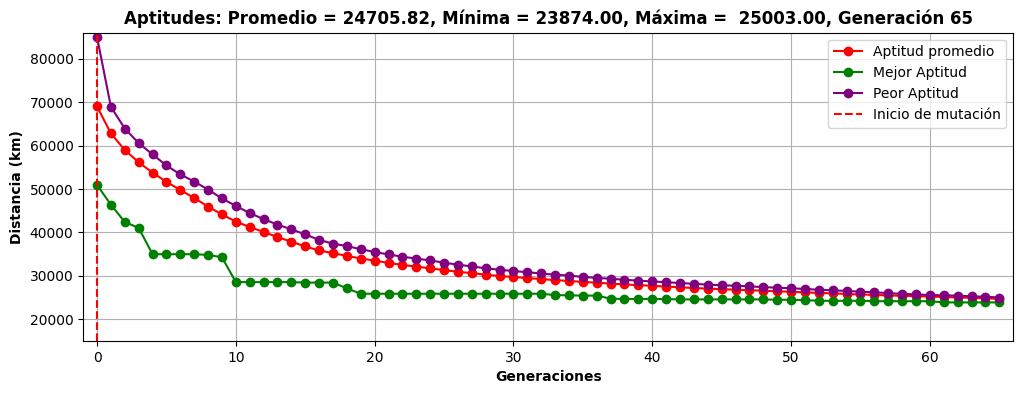

In [14]:
resultados,gen = TSP_alg_genetico(65, poblaciones[0])

In [15]:
resultados["APTITUD"]

0      23874.0
1      23874.0
2      23874.0
3      23874.0
4      23874.0
        ...   
395    25003.0
396    25003.0
397    25003.0
398    25003.0
399    25003.0
Name: APTITUD, Length: 400, dtype: float64

In [16]:
print("RUTA SEGUIDA: ")
resultados["RUTA SEGUIDA"][0]

RUTA SEGUIDA: 


['Merida',
 'Mexico City',
 'Guadalajara',
 'Monterrey',
 'Washington D.C.',
 'New York',
 'Boston',
 'Miami',
 'Caracas',
 'Brazilia',
 'Montevideo',
 'Buenos Aires',
 'Mendoza',
 'Quito',
 'Bogotá',
 'Panama City',
 'Managua',
 'San Salvador',
 'Merida']

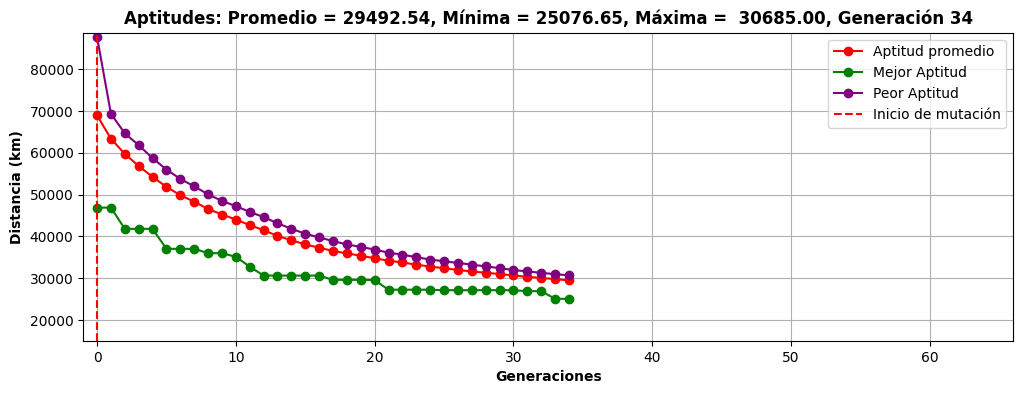

In [ ]:
RESULTADOS = pd.DataFrame(columns = ["Mejor Aptitud", "Generaciones"])
experimento_1 = []
generaciones = []
for iteracion in range(5):
    #for poblacion in poblaciones:
    resultados, generacion = TSP_alg_genetico(65, poblaciones[2])
    experimento_1.append(resultados["APTITUD"][0])
    generaciones.append(generacion)
RESULTADOS["Mejor Aptitud"] = experimento_1
RESULTADOS["Generaciones"] = generaciones

In [ ]:
RESULTADOS